https://huggingface.co/docs/tokenizers/pipeline

### Tokenization Models
**WordLevel**	This is the “classic” tokenization algorithm. It let’s you simply map words to IDs without anything fancy. This has the advantage of being really simple to use and understand, but it requires extremely large vocabularies for a good coverage. Using this Model requires the use of a PreTokenizer. No choice will be made by this model directly, it simply maps input tokens to IDs.

**BPE**	One of the most popular subword tokenization algorithm. The Byte-Pair-Encoding works by starting with characters, while merging those that are the most frequently seen together, thus creating new tokens. It then works iteratively to build new tokens out of the most frequent pairs it sees in a corpus. BPE is able to build words it has never seen by using multiple subword tokens, and thus requires smaller vocabularies, with less chances of having “unk” (unknown) tokens.

**WordPiece**	This is a subword tokenization algorithm quite similar to BPE, used mainly by Google in models like BERT. It uses a greedy algorithm, that tries to build long words first, splitting in multiple tokens when entire words don’t exist in the vocabulary. This is different from BPE that starts from characters, building bigger tokens as possible. It uses the famous ## prefix to identify tokens that are part of a word (ie not starting a word).

**Unigram**	Unigram is also a subword tokenization algorithm, and works by trying to identify the best set of subword tokens to maximize the probability for a given sentence. This is different from BPE in the way that this is not deterministic based on a set of rules applied sequentially. Instead Unigram will be able to compute multiple ways of tokenizing, while choosing the most probable one.

In [88]:
from datasets import load_dataset
wiki_dataset = load_dataset("yehzw/wikitext-103", "raw")

In [ ]:
# Compare popular tokenizers using different algorithms
from transformers import AutoTokenizer

# WordLevel:  BERT uses WordPiece but has word-level characteristics
tokenizer_wordlevel = AutoTokenizer.from_pretrained("google-bert/bert-base-cased")  # BERT uses WordPiece but has word-level characteristics
print("WordLevel-style (BERT cased):", tokenizer_wordlevel.__class__.__name__)

# BPE: GPT-2, GPT-3, GPT-4, RoBERTa
tokenizer_bpe = AutoTokenizer.from_pretrained("openai-community/gpt2")
print("BPE (GPT-2):", tokenizer_bpe.__class__.__name__)

# WordPiece: BERT, DistilBERT, ELECTRA
tokenizer_wordpiece = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
print("WordPiece (BERT uncased):", tokenizer_wordpiece.__class__.__name__)

# Unigram: T5, ALBERT, XLNet, mBART
tokenizer_unigram = AutoTokenizer.from_pretrained("google-t5/t5-small")
print("Unigram (T5):", tokenizer_unigram.__class__.__name__)

WordLevel-style (BERT cased): BertTokenizerFast
BPE (GPT-2): GPT2TokenizerFast
WordPiece (BERT uncased): BertTokenizerFast
Unigram (T5): T5TokenizerFast


In [ ]:
# Test all tokenizers on the same sentence
sentence = "Hello, y'all! How are you 😁 ?"

print("\nTokenization comparison:\n")
print("=" * 80)

for name, tokenizer in [
    ("BERT Cased (WordLevel-like)", tokenizer_wordlevel),
    ("GPT-2 (BPE)", tokenizer_bpe),
    ("BERT Uncased (WordPiece)", tokenizer_wordpiece),
    ("T5 (Unigram)", tokenizer_unigram)
]:
    print(f"\n--- {name} ---")
    tokens = tokenizer.tokenize(sentence)
    token_ids = tokenizer.encode(sentence, add_special_tokens=False)
    
    print(f"Tokens ({len(tokens)}): {tokens}")
    print(f"Token IDs: {token_ids}")
    print(f"Decoded: {tokenizer.decode(token_ids)}")
    print(f"Vocab size: {tokenizer.vocab_size:,}")


Tokenization comparison:


--- BERT Cased (WordPiece-like) ---
Tokens (11): ['Hello', ',', 'y', "'", 'all', '!', 'How', 'are', 'you', '[UNK]', '?']
Token IDs: [8667, 117, 194, 112, 1155, 106, 1731, 1132, 1128, 100, 136]
Decoded: Hello, y ' all! How are you [UNK]?
Vocab size: 28,996

--- GPT-2 (BPE) ---
Tokens (12): ['Hello', ',', 'Ġy', "'", 'all', '!', 'ĠHow', 'Ġare', 'Ġyou', 'ĠðŁĺ', 'ģ', 'Ġ?']
Token IDs: [15496, 11, 331, 6, 439, 0, 1374, 389, 345, 30325, 223, 5633]
Decoded: Hello, y'all! How are you 😁 ?
Vocab size: 50,257

--- BERT Uncased (WordPiece) ---
Tokens (11): ['hello', ',', 'y', "'", 'all', '!', 'how', 'are', 'you', '[UNK]', '?']
Token IDs: [7592, 1010, 1061, 1005, 2035, 999, 2129, 2024, 2017, 100, 1029]
Decoded: hello, y ' all! how are you [UNK]?
Vocab size: 30,522

--- T5 (Unigram) ---
Tokens (14): ['▁Hello', ',', '▁', 'y', "'", 'all', '!', '▁How', '▁are', '▁you', '▁', '😁', '▁', '?']
Token IDs: [8774, 6, 3, 63, 31, 1748, 55, 571, 33, 25, 3, 2, 3, 58]
Decoded: Hello, y'all!

In [87]:
# Show characteristic differences between tokenizers

# 1. BPE (GPT-2) - merges from characters, uses 'Ġ' for spaces
print("=== BPE Characteristics (GPT-2) ===")
text = "unhappiness"
tokens_bpe = tokenizer_bpe.tokenize(text)
print(f"'{text}' → {tokens_bpe}")
print("Notice: BPE builds from smaller units, 'Ġ' indicates space")

# 2. WordPiece (BERT) - greedy algorithm, uses '##' prefix
print("\n=== WordPiece Characteristics (BERT) ===")
tokens_wp = tokenizer_wordpiece.tokenize(text)
print(f"'{text}' → {tokens_wp}")
print("Notice: '##' prefix for subword continuations")

# 3. Unigram (T5) - probabilistic, uses '▁' for spaces
print("\n=== Unigram Characteristics (T5) ===")
tokens_unigram = tokenizer_unigram.tokenize(text)
print(f"'{text}' → {tokens_unigram}")
print("Notice: '▁' (underscore) marks word boundaries")

# Test with multiple tokenization possibilities
print("\n=== Subword Handling ===")
rare_word = "antidisestablishmentarianism"
print(f"\nWord: '{rare_word}'")
for name, tok in [("GPT-2", tokenizer_bpe), ("BERT", tokenizer_wordpiece), ("T5", tokenizer_unigram)]:
    tokens = tok.tokenize(rare_word)
    print(f"{name}: {len(tokens)} tokens → {tokens[:5]}...")

=== BPE Characteristics (GPT-2) ===
'unhappiness' → ['un', 'h', 'appiness']
Notice: BPE builds from smaller units, 'Ġ' indicates space

=== WordPiece Characteristics (BERT) ===
'unhappiness' → ['un', '##ha', '##pp', '##iness']
Notice: '##' prefix for subword continuations

=== Unigram Characteristics (T5) ===
'unhappiness' → ['▁un', 'h', 'app', 'iness']
Notice: '▁' (underscore) marks word boundaries

=== Subword Handling ===

Word: 'antidisestablishmentarianism'
GPT-2: 5 tokens → ['ant', 'idis', 'establishment', 'arian', 'ism']...
BERT: 8 tokens → ['anti', '##dis', '##est', '##ab', '##lish']...
T5: 9 tokens → ['▁anti', 'd', 'is', 'est', 'abl']...


=== Vocabulary Utilization Analysis ===



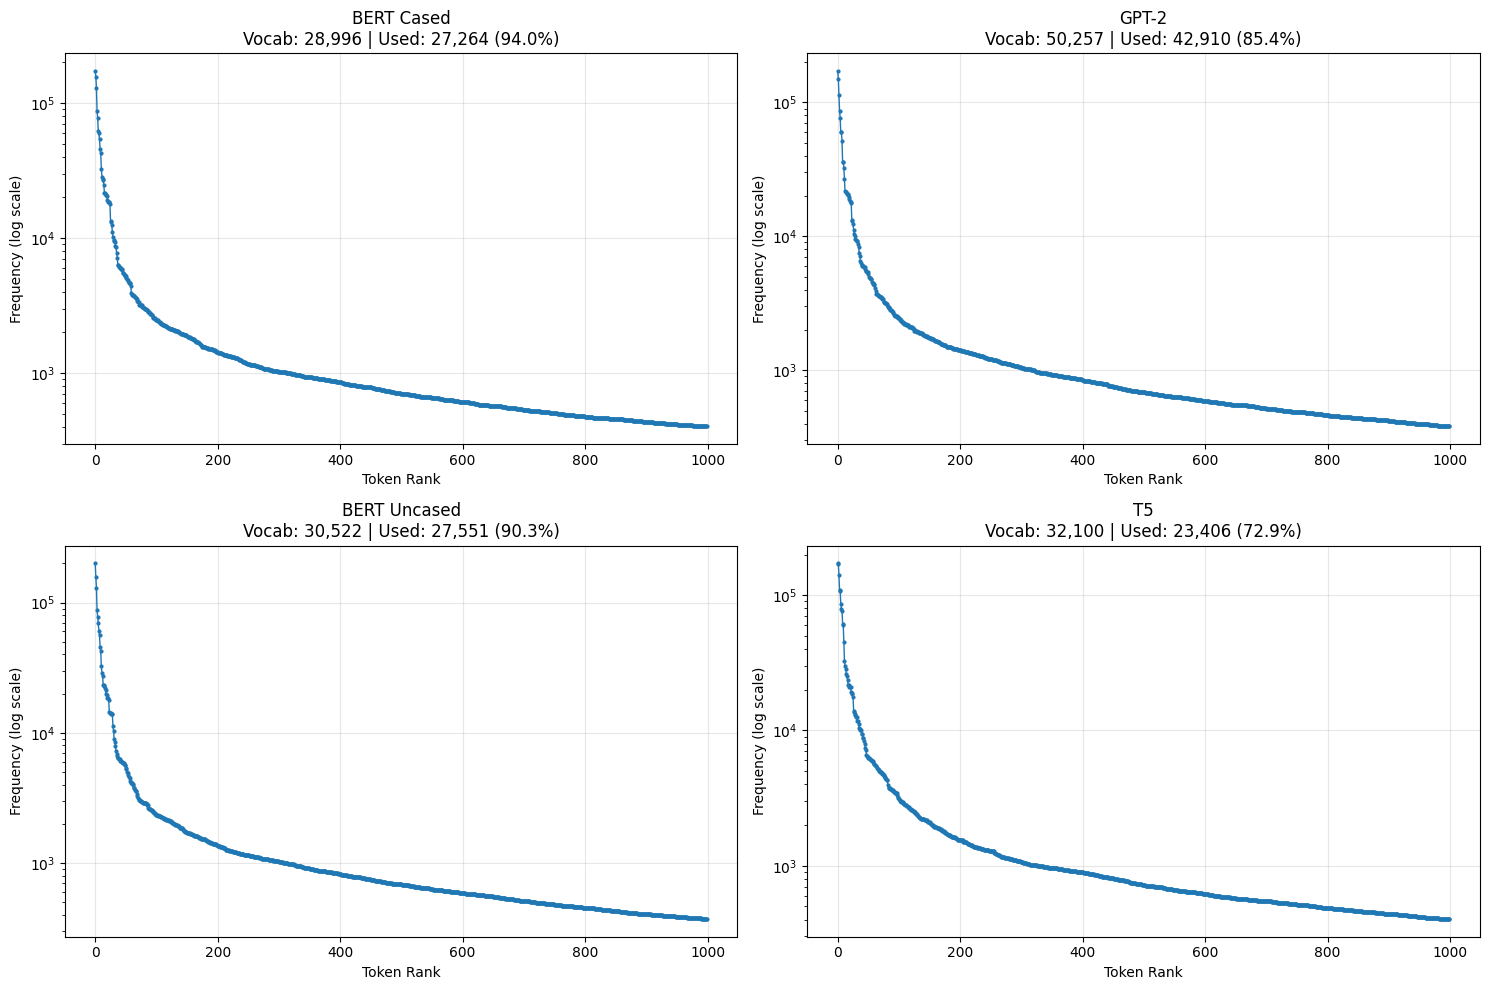


Vocabulary Utilization Summary:
BERT Cased:
  Total vocab size: 28,996
  Unique tokens used: 27,264 (94.0%)
  Top 10 tokens cover: 24.9% of all tokens

GPT-2:
  Total vocab size: 50,257
  Unique tokens used: 42,910 (85.4%)
  Top 10 tokens cover: 23.9% of all tokens

BERT Uncased:
  Total vocab size: 30,522
  Unique tokens used: 27,551 (90.3%)
  Top 10 tokens cover: 26.8% of all tokens

T5:
  Total vocab size: 32,100
  Unique tokens used: 23,406 (72.9%)
  Top 10 tokens cover: 27.2% of all tokens



In [95]:
# 1. Vocabulary Efficiency: How many unique tokens are actually used?
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

print("=== Vocabulary Utilization Analysis ===\n")

# Collect all tokens used across the sample
tokenizer_token_usage = {
    "BERT Cased": [], 
    "GPT-2": [], 
    "BERT Uncased": [], 
    "T5": []
}

sample_size = 1000
for split in ["train"]:
    split_data = wiki_dataset[split]
    num_samples = min(sample_size, len(split_data))
    
    for i in range(num_samples):
        text = split_data[i]["text"]
        if not text or len(text.strip()) == 0:
            continue
            
        for name, tokenizer in [
            ("BERT Cased", tokenizer_wordlevel),
            ("GPT-2", tokenizer_bpe),
            ("BERT Uncased", tokenizer_wordpiece),
            ("T5", tokenizer_unigram)
        ]:
            try:
                token_ids = tokenizer.encode(text)
                tokenizer_token_usage[name].extend(token_ids)
            except:
                continue

# Analyze vocabulary usage
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for idx, (name, token_ids) in enumerate(tokenizer_token_usage.items()):
    token_counts = Counter(token_ids)
    vocab_size = tokenizer_wordlevel.vocab_size if name == "BERT Cased" else \
                 tokenizer_bpe.vocab_size if name == "GPT-2" else \
                 tokenizer_wordpiece.vocab_size if name == "BERT Uncased" else \
                 tokenizer_unigram.vocab_size
    
    unique_tokens = len(token_counts)
    usage_rate = (unique_tokens / vocab_size) * 100
    
    # Plot token frequency distribution
    sorted_counts = sorted(token_counts.values(), reverse=True)
    axes[idx].plot(sorted_counts[:1000], marker='o', markersize=2, linewidth=1)
    axes[idx].set_yscale('log')
    axes[idx].set_title(f"{name}\nVocab: {vocab_size:,} | Used: {unique_tokens:,} ({usage_rate:.1f}%)")
    axes[idx].set_xlabel("Token Rank")
    axes[idx].set_ylabel("Frequency (log scale)")
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nVocabulary Utilization Summary:")
for name, token_ids in tokenizer_token_usage.items():
    token_counts = Counter(token_ids)
    vocab_size = tokenizer_wordlevel.vocab_size if name == "BERT Cased" else \
                 tokenizer_bpe.vocab_size if name == "GPT-2" else \
                 tokenizer_wordpiece.vocab_size if name == "BERT Uncased" else \
                 tokenizer_unigram.vocab_size
    
    unique_tokens = len(token_counts)
    total_tokens = len(token_ids)
    top_10_coverage = sum(sorted(token_counts.values(), reverse=True)[:10]) / total_tokens * 100
    
    print(f"{name}:")
    print(f"  Total vocab size: {vocab_size:,}")
    print(f"  Unique tokens used: {unique_tokens:,} ({unique_tokens/vocab_size*100:.1f}%)")
    print(f"  Top 10 tokens cover: {top_10_coverage:.1f}% of all tokens")
    print()

=== Rare Word Tokenization Analysis ===

Word                                     BERT Cased   GPT-2        BERT Uncased T5          
antidisestablishmentarianism             8            5            8            9           
pneumonoultramicroscopicsilicovolcanoconiosis 17           15           17           17          
supercalifragilisticexpialidocious       11           11           11           11          
floccinaucinihilipilification            9            9            9            10          
honorificabilitudinitatibus              9            9            9            8           
incomprehensibilities                    7            5            6            5           
uncharacteristically                     6            4            6            4           
electroencephalograph                    6            5            5            4           


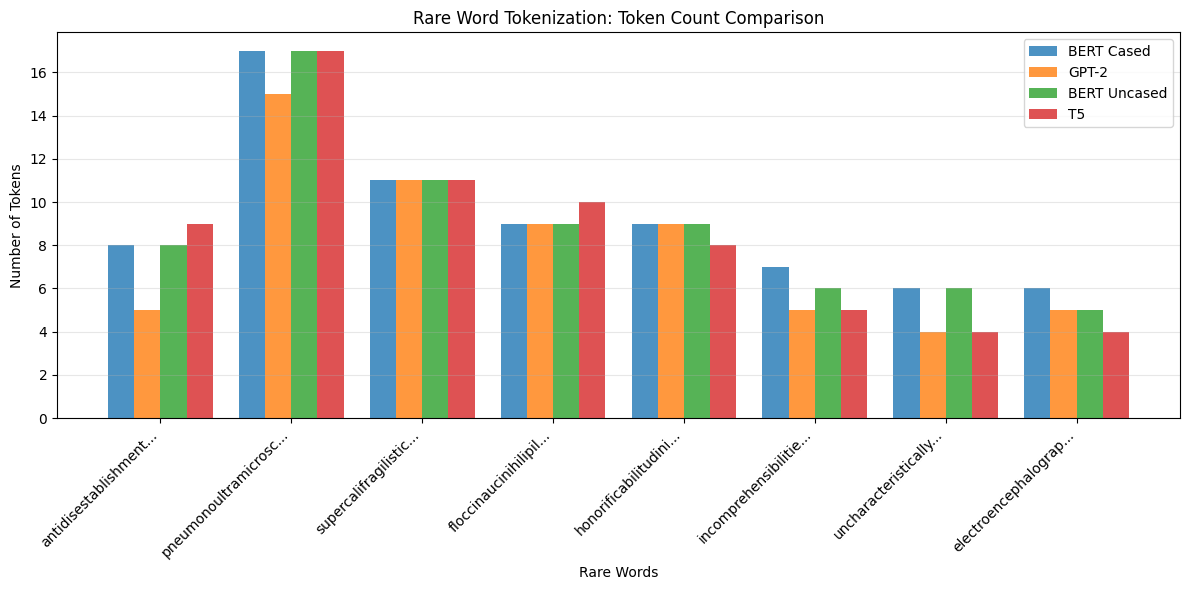


Rare Word Statistics:
BERT Cased: Mean tokens = 9.1, Max = 17
GPT-2: Mean tokens = 7.9, Max = 15
BERT Uncased: Mean tokens = 8.9, Max = 17
T5: Mean tokens = 8.5, Max = 17


In [96]:
# 3. Rare Word Handling: How do they tokenize OOV (out-of-vocabulary) words?
print("=== Rare Word Tokenization Analysis ===\n")

rare_words = [
    "antidisestablishmentarianism",
    "pneumonoultramicroscopicsilicovolcanoconiosis",
    "supercalifragilisticexpialidocious",
    "floccinaucinihilipilification",
    "honorificabilitudinitatibus",
    "incomprehensibilities",
    "uncharacteristically",
    "electroencephalograph"
]

rare_word_stats = {
    "BERT Cased": [],
    "GPT-2": [],
    "BERT Uncased": [],
    "T5": []
}

print(f"{'Word':<40} {'BERT Cased':<12} {'GPT-2':<12} {'BERT Uncased':<12} {'T5':<12}")
print("=" * 100)

for word in rare_words:
    token_counts = {}
    for name, tokenizer in [
        ("BERT Cased", tokenizer_wordlevel),
        ("GPT-2", tokenizer_bpe),
        ("BERT Uncased", tokenizer_wordpiece),
        ("T5", tokenizer_unigram)
    ]:
        tokens = tokenizer.tokenize(word)
        token_count = len(tokens)
        token_counts[name] = token_count
        rare_word_stats[name].append(token_count)
    
    print(f"{word:<40} {token_counts['BERT Cased']:<12} {token_counts['GPT-2']:<12} {token_counts['BERT Uncased']:<12} {token_counts['T5']:<12}")

# Visualize
plt.figure(figsize=(12, 6))
x = np.arange(len(rare_words))
width = 0.2

for idx, (name, counts) in enumerate(rare_word_stats.items()):
    plt.bar(x + idx * width, counts, width, label=name, alpha=0.8)

plt.xlabel("Rare Words")
plt.ylabel("Number of Tokens")
plt.title("Rare Word Tokenization: Token Count Comparison")
plt.xticks(x + width * 1.5, [w[:20] + "..." for w in rare_words], rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\nRare Word Statistics:")
for name, counts in rare_word_stats.items():
    print(f"{name}: Mean tokens = {np.mean(counts):.1f}, Max = {max(counts)}")

### Decoders
Decoders are used to convert tokenized sequences back into human-readable strings. Each tokenization model has a corresponding decoder that understands how to reconstruct the original text from the tokens. For example, the BPE decoder merges subword tokens back into full words, while handling special tokens appropriately. Decoders ensure that the output text maintains the original formatting and meaning as closely as possible after tokenization and processing.

**ByteLevel**	Reverts the ByteLevel PreTokenizer. This PreTokenizer encodes at the byte-level, using a set of visible Unicode characters to represent each byte, so we need a Decoder to revert this process and get something readable again.

**Metaspace**	Reverts the Metaspace PreTokenizer. This PreTokenizer uses a special identifer ▁ to identify whitespaces, and so this Decoder helps with decoding these.

**WordPiece**	Reverts the WordPiece Model. This model uses a special identifier ## for continuing subwords, and so this Decoder helps with decoding these.